In [2]:
import requests
import json

# Retrieve data from API
token_address="0xdd974d5c2e2928dea5f71b9825b8b646686bd200"
url = "https://data-api-gateway.amberdata.io/api/v1/market/tokens/prices/" + token_address + "/historical?timeFormat=iso&timeInterval=h"
headers = {'content-type': 'application/json', 'x-api-key': '<enter_your_api_key_here>'}

myResponse = requests.get(url, headers=headers, verify=True)
if(not myResponse.ok):
    # print(myResponse.status_code)
    # print(myResponse.content)
    myResponse.raise_for_status()

# Parse JSON data
jData = json.loads(myResponse.content)

In [3]:
import dateutil.parser
import pandas as pd

# Load & transform JSON data into Data Frame
df = pd.DataFrame(jData['payload']['data'], columns=jData['payload']['metadata']['columns'])
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['circulatingSupply'] = df['circulatingSupply'].astype('float64')
df['totalSupply'] = df['totalSupply'].astype('float64')
df.head(5)

,timestamp,priceUSD,priceETH,hourlyPercentChangeETH,hourlyPercentChangeUSD,dailyPercentChangeETH,dailyPercentChangeUSD,dailyVolumeETH,dailyVolumeUSD,weeklyPercentChangeETH,weeklyPercentChangeUSD,circulatingSupply,totalSupply,marketCapETH,marketCapUSD
0,2019-09-12 08:00:00,0.219032,0.001225,3.3402,3.593660,13.4688,13.20420,32616.684717,5.830927e+06,34.3617,37.8786,1.681523e+08,2.133964e+08,206021.8816845622,36830800.10340701
1,2019-09-12 09:00:00,0.212192,0.001185,-3.2120,-3.075810,11.4531,11.26530,33163.064839,5.937208e+06,29.7968,33.5807,1.681523e+08,2.133964e+08,199298.22495021654,35680506.55086851
2,2019-09-12 10:00:00,0.212319,0.001184,-0.6341,-0.405123,11.8572,11.80620,33730.942161,6.050842e+06,29.1481,33.3936,1.681523e+08,2.133964e+08,199023.6621446481,35701961.78748886
3,2019-09-12 11:00:00,0.206741,0.001154,-2.8900,-3.039250,9.0488,8.80713,34404.042160,6.162339e+06,25.4392,29.6054,1.681523e+08,2.133964e+08,194085.4200120667,34763945.01319944
4,2019-09-12 12:00:00,0.206853,0.001155,0.0845,0.132636,8.4933,8.52335,35027.075691,6.273920e+06,23.9110,28.2186,1.681523e+08,2.133964e+08,194190.99859383583,34782772.472249225


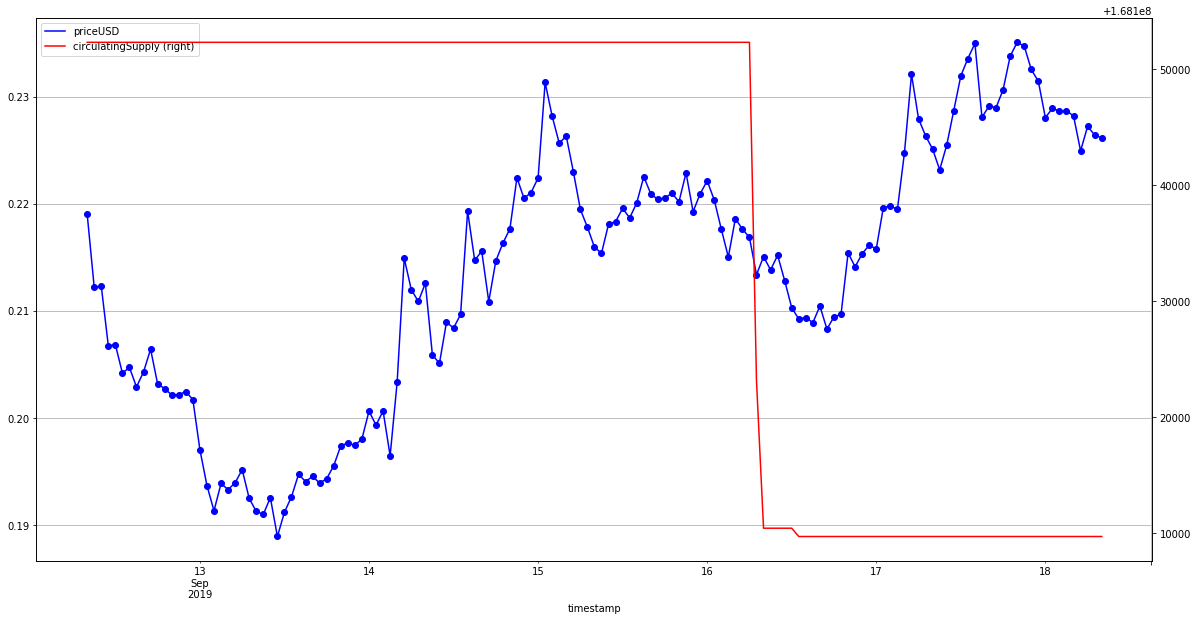

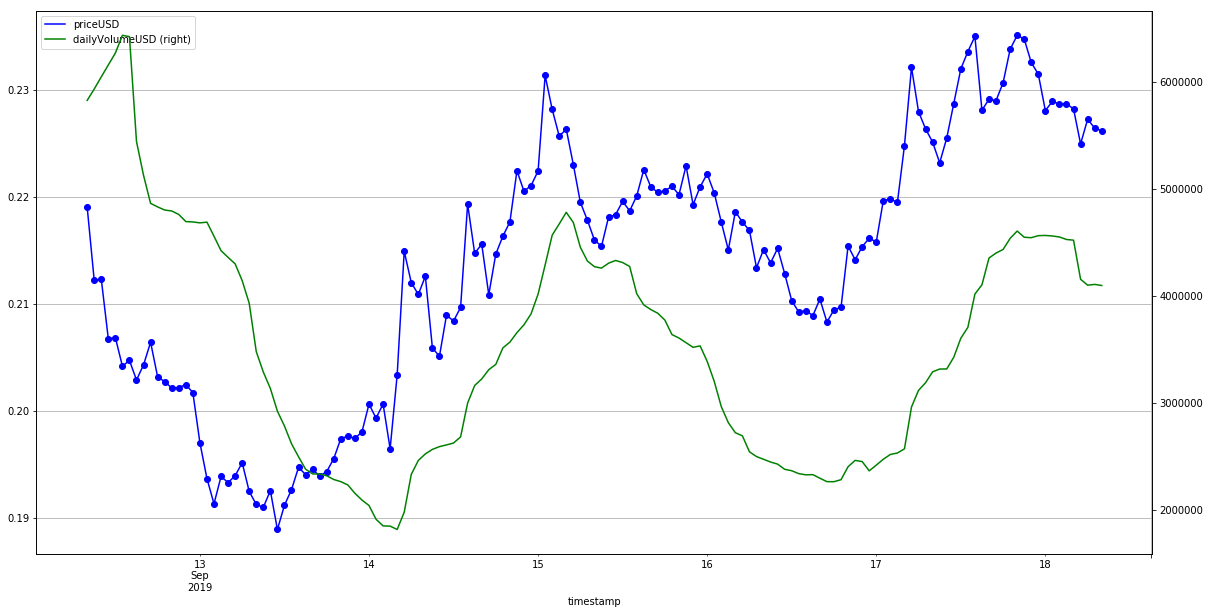

In [5]:
import matplotlib.pyplot as plt

# Plot Price and Circulating Supply time series
fig, ax = plt.subplots(figsize=(20, 10))
ax = df.plot(ax=ax, kind='line', x='timestamp', y='priceUSD', c='Blue', grid=True, style='-o')
ax = df.plot(ax=ax, kind='line', x='timestamp', y='circulatingSupply', c='Red', grid=True, secondary_y=True, style='b')
plt.show()

# Plot Price and Volume time series
fig, ax = plt.subplots(figsize=(20, 10))
ax = df.plot(ax=ax, kind='line', x='timestamp', y='priceUSD', c='Blue', grid=True, style='-o')
ax = df.plot(ax=ax, kind='line', x='timestamp', y='dailyVolumeUSD', c='Green', grid=True, secondary_y=True, style='b')
plt.show()